# 1. VAR Process

In the data `raotb16.csv` we have some macroeconomic data.

1. Test which series Granger cause each other.

2. Test which series are stationary

3. Fit a VAR on the system of time series. Find the best number of lags. Don't forget to differentiate the series that need it.

4. Fit a VAR on everything except the last 12 months (4 quarters) of the data. Backtest your model against the actual last year in the data. Plot the predictions against the data for each series.

In [2]:
#Librairy
import tqdm
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
from linearmodels.panel import PooledOLS
from datetime import datetime as dt
from statsmodels.tsa.arima_model import ARIMA

In [4]:
import warnings
warnings.filterwarnings('ignore')


In [7]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

In [3]:
df = pd.read_csv("data/raotb16.csv")
df.date = pd.to_datetime(df.date)
df = df.set_index("date")

In [18]:
df.head(5)

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


## 1. Test which series Granger cause each other.

In [19]:
model = VAR(df)
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 26, Apr, 2021
Time:                     20:27:04
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                  -0.955139
Nobs:                     121.000    HQIC:                  -2.82128
Log likelihood:          -989.633    FPE:                  0.0168645
AIC:                     -4.09752    Det(Omega_mle):      0.00589146
--------------------------------------------------------------------
Results for equation rgnp
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const          -48.956324        48.111136           -1.018           0.309
L1.rgnp          1.001278         0.124957            8.013           0.000
L1.pgnp         -2.984086         4.167246           -0.716           0.474
L1.ul

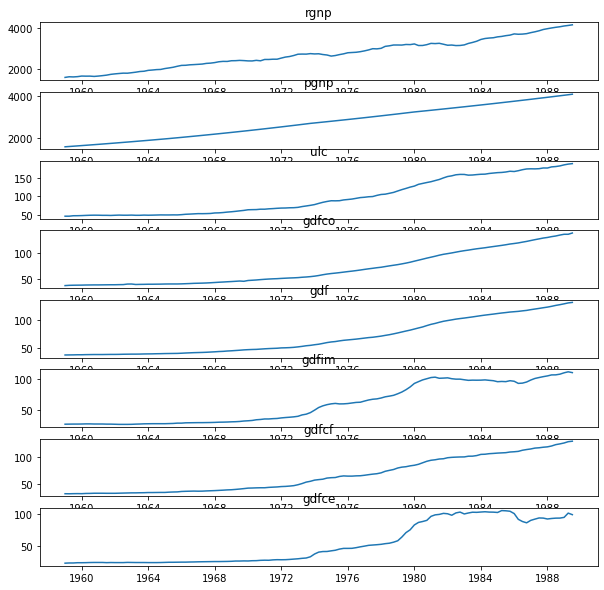

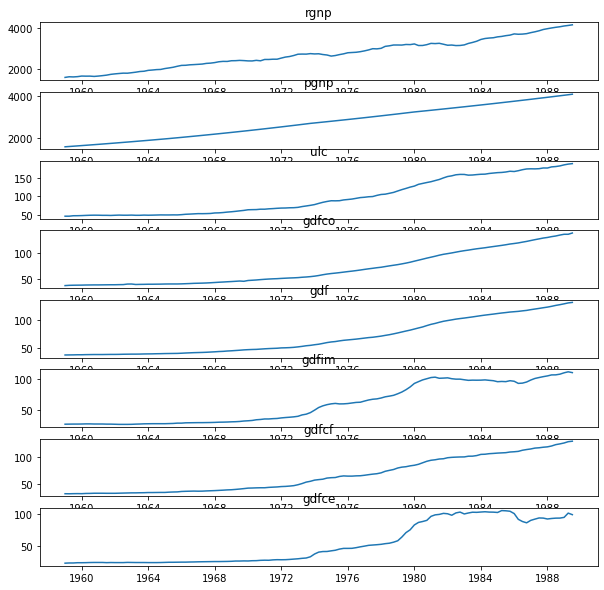

In [20]:
results.plot()

## 2. Test which series are stationary

In [21]:
ts_log = np.log(df)
ts_smooth = ts_log.rolling(window = 12).mean()
sub_ts = ts_log - ts_smooth
sub_ts.dropna(inplace = True)

rgnp


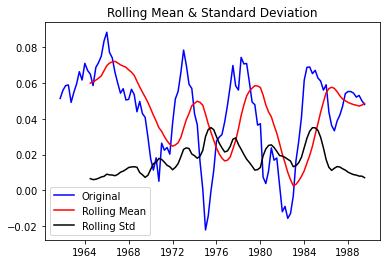

Results of Dickey-Fuller Test:
Test Statistic                  -3.607440
p-value                          0.005620
#Lags Used                       2.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64


pgnp


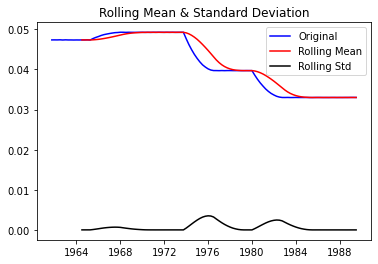

Results of Dickey-Fuller Test:
Test Statistic                  -0.850589
p-value                          0.803809
#Lags Used                       1.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


ulc


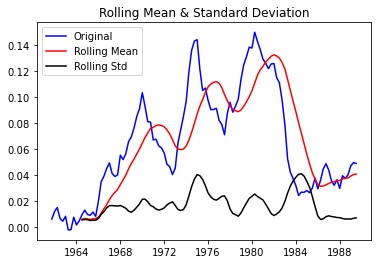

Results of Dickey-Fuller Test:
Test Statistic                  -2.098555
p-value                          0.245096
#Lags Used                       2.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64


gdfco


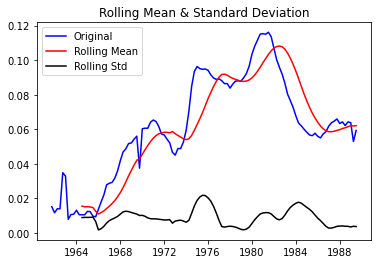

Results of Dickey-Fuller Test:
Test Statistic                  -1.875114
p-value                          0.343857
#Lags Used                       3.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


gdf


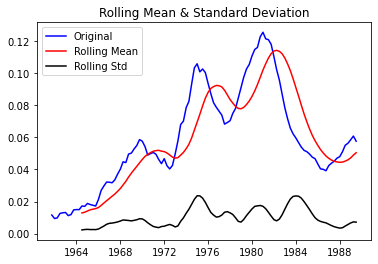

Results of Dickey-Fuller Test:
Test Statistic                  -1.900451
p-value                          0.331849
#Lags Used                       7.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


gdfim


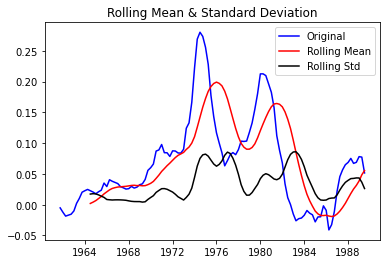

Results of Dickey-Fuller Test:
Test Statistic                  -2.978633
p-value                          0.036939
#Lags Used                       1.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


gdfcf


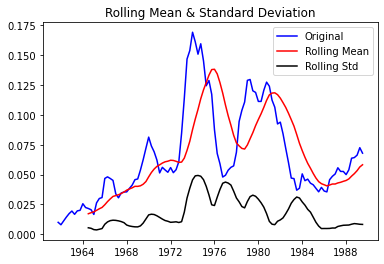

Results of Dickey-Fuller Test:
Test Statistic                  -2.498465
p-value                          0.115848
#Lags Used                       4.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


gdfce


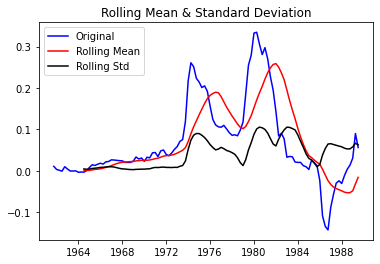

Results of Dickey-Fuller Test:
Test Statistic                  -2.489782
p-value                          0.117980
#Lags Used                       1.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64




In [23]:


for column in sub_ts.columns:
    print(column)
    print(test_stationarity(sub_ts[column]))
    print("\n")



## Which one is stationary 

## 3. Fit a VAR on the system of time series. Find the best number of lags. Don't forget to differentiate the series that need it.

In [24]:
endog = df.loc["1959-01-01": "1989-07-01"]

In [25]:
exog = endog["rgnp"]
mod = sm.tsa.VARMAX(endog[['pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce']], order=(2,0), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())


                                               Statespace Model Results                                               
Dep. Variable:     ['pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce']   No. Observations:                  123
Model:                                                                VARX(2)   Log Likelihood               -9003.375
Date:                                                        Mon, 26 Apr 2021   AIC                          18272.751
Time:                                                                20:40:00   BIC                          18646.771
Sample:                                                            01-01-1959   HQIC                         18424.677
                                                                 - 07-01-1989                                         
Covariance Type:                                                          opg                                         
Ljung-Box (L1) (Q):     111.39, 110.48, 118.79, 

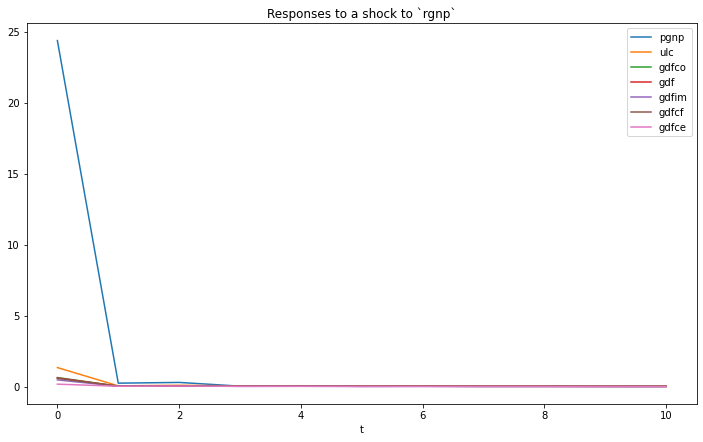

In [29]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(12,7))
ax.set(xlabel='t', title='Responses to a shock to `rgnp`');

## 4. Fit a VAR on everything except the last 12 months (4 quarters) of the data. Backtest your model against the actual last year in the data. Plot the predictions against the data for each series.

C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


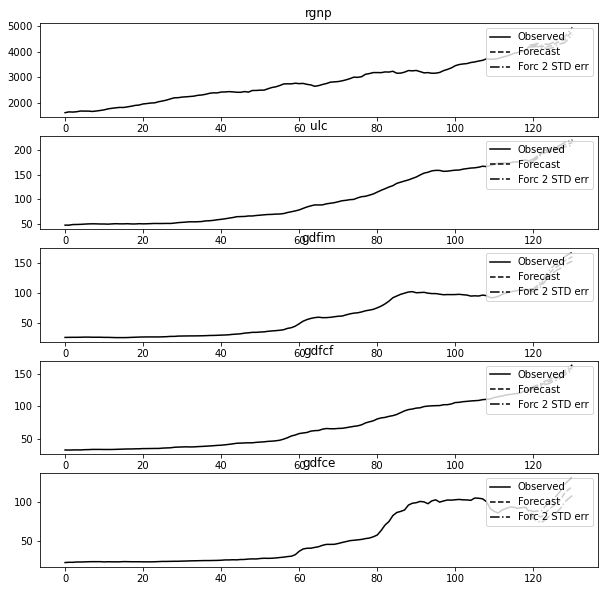

In [4]:

train = df[:-4] #remove past 4 quarters
model = VAR(train[['rgnp', 'ulc', 'gdfim', 'gdfcf', 'gdfce']]) #training on stationary data
results = model.fit(maxlags=12, ic='aic')
#results.forecast(data.values[-lag_order:], 5)
results.plot_forecast(12);



# 2. Gun Violence Panel

The [Gun Violence](https://www.kaggle.com/jameslko/gun-violence-data) dataset

1. Transform it into an amenable panel (or structure of multiple time series) to analyze and create a forecast for the next year outside the sample in **Chicago**, **Washington** and **New Orleans**, and the US as a whole.

2. Are there other (non time series) predictors which could be used in this dataset to help predict severity or number of shootings in the future? Analyze the data for feature importance and explain your findings.

In [20]:
df_guns = pd.read_csv('data/gun-violence.csv')
df_guns = df_guns[['date','city_or_county', 'n_killed', 'n_injured', 'n_guns_involved']]
df_guns.date = df_guns.date.astype(str)
df_guns.date = df_guns.date.apply(lambda x: '{:%Y}'.format(dt.strptime(x, '%Y-%m-%d')))
df_guns['date'] = pd.to_datetime(df_guns.date)
df_guns = df_guns.set_index("date")



In [21]:
df_guns.head(10)

,city_or_county,n_killed,n_injured,n_guns_involved
date,,,,
2013-01-01,Mckeesport,0,4,NaN
2013-01-01,Hawthorne,1,3,NaN
2013-01-01,Lorain,1,3,2.0
2013-01-01,Aurora,4,0,NaN
2013-01-01,Greensboro,2,2,2.0
2013-01-01,Tulsa,4,0,NaN
2013-01-01,Albuquerque,5,0,2.0
2013-01-01,New Orleans,0,5,NaN
2013-01-01,Brentwood,0,4,NaN


In [28]:
#select the right city
df_guns_final = df_guns.loc[(df_guns.city_or_county=='Chicago') |
                      (df_guns.city_or_county=='Washington') |
                      (df_guns.city_or_county=='New Orleans')]


df_guns_final = df_guns_final.groupby(["date", "city_or_county"]).sum()

df_guns_final.head()

n_killed  n_injured  n_guns_involved
date       city_or_county                                      
2013-01-01 Chicago                6         71              4.0
           New Orleans            0         32              3.0
           Washington             1         29              5.0
2014-01-01 Chicago              414       1893            225.0
           New Orleans          163        431             39.0

In [33]:
chicago = df_guns.loc[df_guns.city_or_county == "Chicago"].groupby("date").sum()

C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


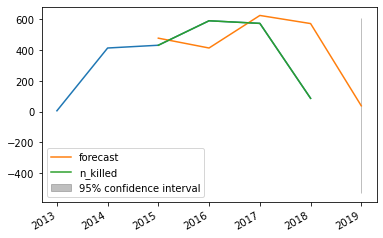

In [35]:
model = ARIMA(chicago.n_killed, order=(2, 1, 0))  
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(chicago.n_killed);

res.plot_predict('2015', '2019', ax=ax);

In [36]:
washington = df_guns.loc[df_guns.city_or_county == "Washington"].groupby("date").sum()

C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


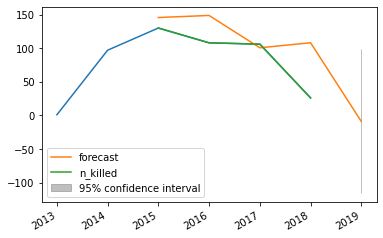

In [37]:
model = ARIMA(washington.n_killed, order=(1, 1, 0))  
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(washington.n_killed);

res.plot_predict('2015', '2019', ax=ax);



In [45]:
new_orleans = df_guns.loc[df_guns.city_or_county == "New Orleans"].groupby("date").sum()

In [46]:
new_orleans

,n_killed,n_injured,n_guns_involved
date,,,
2013-01-01,0,32,3.0
2014-01-01,163,431,39.0
2015-01-01,174,373,137.0
2016-01-01,174,492,567.0
2017-01-01,147,482,736.0
2018-01-01,45,82,144.0


C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


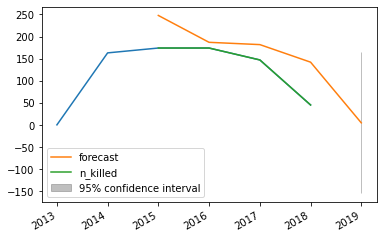

In [47]:
model = ARIMA(new_orleans.n_killed, order=(1, 1, 0))  
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(new_orleans.n_killed);

res.plot_predict('2015', '2019', ax=ax);


In [59]:

df = pd.read_csv('data/gun-violence.csv')
df = df[['date','city_or_county', 'n_killed', 'n_injured', 'n_guns_involved']]
df['date'] = pd.to_datetime(df.date)
df['month'] = df['date'].dt.strftime('%Y-%m-01')
df['month'] = pd.to_datetime(df.month)

In [61]:
df

,date,city_or_county,n_killed,n_injured,n_guns_involved,month
0,2013-01-01,Mckeesport,0,4,NaN,2013-01-01
1,2013-01-01,Hawthorne,1,3,NaN,2013-01-01
2,2013-01-01,Lorain,1,3,2.0,2013-01-01
3,2013-01-05,Aurora,4,0,NaN,2013-01-01
4,2013-01-07,Greensboro,2,2,2.0,2013-01-01
...,...,...,...,...,...,...
239672,2018-03-31,Rayne,0,0,1.0,2018-03-01
239673,2018-03-31,Natchitoches,1,0,1.0,2018-03-01
239674,2018-03-31,Gretna,0,1,1.0,2018-03-01
239675,2018-03-31,Houston,1,0,1.0,2018-03-01


In [63]:
# Looking at USA

df_usa = df.groupby(['month']).sum()
df_usa = df_usa[['n_killed']]
df_usa.head(10)



,n_killed
month,
2013-01-01,23
2013-02-01,14
2013-03-01,25
2013-04-01,26
2013-05-01,20
2013-06-01,25
2013-07-01,31
2013-08-01,35
2013-09-01,37


C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


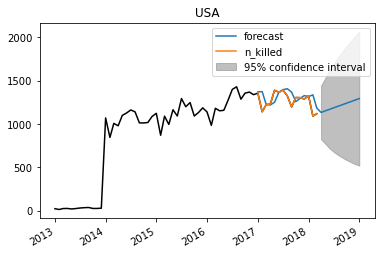

In [64]:
model = ARIMA(df_usa, order=(1, 1, 0))  
res = model.fit(disp=-1)
  
fig, ax = plt.subplots()
ax.plot(df_usa[:],color='black')

res.plot_predict('2017-01-01', '2019-01-01',ax=ax)
plt.title(label='USA');



## 2. Are there other (non time series) predictors which could be used in this dataset to help predict severity or number of shooting in the future? Analyze the data for feature importance and explain your findings?

I think we would need more data on the shooters like age, sex, ethnicity. I think having the lattitude and longitude of the shooter would also be useful, and if we could combine this information with the response time from the police we might start to have something solid. 